### PCA-v6
```
Filename: PCA-v6.ipynb
Last Update Date: 8-Jul-2018

Description:
Take full featured CSV file (577 features, f0...f576 + label) and use parameter retainVariance
with PCA which returns reduced columns (95% gives 178 features in this case).  Write this into a CSV file
Approximate Run time: 5 mins
Version: 
    v5: 08-Jul-2018: Initial Creation
    v6: 13-Jul-2018: Adding three parameters 1. Transformed Output, 2. Transformed Output with new headers
                     3. Original Data output
```

In [24]:
# Setup parameters
# fileNameNoPrefix = "Librosa120Sec577FeatsCSVExtract20_v3" # Train
fileNameNoPrefix = "Librosa120Sec577FeatsCSVExtract10Test_v3" # Test
retainVariance = 0.99 # retain percentage variance = 95%
writeTransformedDataFlag = True
writeTransformedDataHeaderOverrideFlag = False

In [25]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import datetime

In [26]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-13 16:58:49


In [27]:
df = pd.read_csv(filepath_or_buffer=(fileNameNoPrefix + '.gzip'), sep=',', compression='gzip')
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

In [28]:
x_data = df.drop('label',axis=1)

In [29]:
x_data.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f567', 'f568', 'f569', 'f570', 'f571', 'f572', 'f573', 'f574', 'f575',
       'f576'],
      dtype='object', length=577)

In [30]:
y_data = df["label"].values
y_data

array([0., 0., 0., ..., 1., 1., 1.])

In [31]:
features = StandardScaler().fit_transform(x_data)

In [32]:
type(features)

numpy.ndarray

In [33]:
# Create a PCA that will retain 99% of variance 
pca = PCA(n_components=retainVariance, whiten = True)

In [34]:
# Conduct PCA 
features_pca = pca.fit_transform( features)

In [35]:
# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 577
Reduced number of features: 284


In [36]:
pca.components_.shape

(284, 577)

In [37]:
n_top_feats = pca.components_.shape[0]
n_top_feats

284

### Write CSV with reduced PCA features

In [38]:
import pandas
def getNewDF(X_data, y_labels, componentArray):
    loading_scores = pd.Series(componentArray[0])
    ## now sort the loading scores based on their magnitude
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    top_feats = sorted_loading_scores[0:componentArray.shape[0]].index.values
    overrideHeaderFlag = False
    if writeTransformedDataFlag == True:
        if writeTransformedDataHeaderOverrideFlag == True:
            overrideHeaderFlag = True
    if overrideHeaderFlag == True:
        newHeadList = ["f" + str(i) for i in range(len(top_feats))]
    else:
        newHeadList = ["f" + str(i) for i in top_feats]
    print("newHeadList:", newHeadList)
    newDF = pandas.DataFrame(data=X_data, columns=newHeadList)
    newDF["label"] = y_labels
    return(newDF)

In [39]:
# Write Transformed data or Original Data
if writeTransformedDataFlag == True:
    newDF = getNewDF(features_pca, y_data, pca.components_)
else:
    newDF = getNewDF(X_data, y_data, pca.components_)

newHeadList: ['f438', 'f427', 'f372', 'f401', 'f398', 'f403', 'f422', 'f428', 'f402', 'f467', 'f471', 'f407', 'f429', 'f384', 'f439', 'f349', 'f409', 'f379', 'f368', 'f478', 'f389', 'f446', 'f397', 'f371', 'f460', 'f472', 'f418', 'f450', 'f462', 'f419', 'f498', 'f333', 'f416', 'f459', 'f350', 'f197', 'f361', 'f196', 'f461', 'f453', 'f411', 'f408', 'f423', 'f413', 'f390', 'f377', 'f412', 'f441', 'f484', 'f454', 'f353', 'f367', 'f455', 'f466', 'f360', 'f442', 'f359', 'f195', 'f523', 'f410', 'f479', 'f470', 'f430', 'f477', 'f342', 'f465', 'f449', 'f376', 'f514', 'f456', 'f383', 'f432', 'f295', 'f421', 'f457', 'f396', 'f487', 'f399', 'f510', 'f440', 'f426', 'f488', 'f505', 'f433', 'f504', 'f391', 'f420', 'f404', 'f373', 'f380', 'f338', 'f445', 'f474', 'f492', 'f356', 'f483', 'f517', 'f317', 'f328', 'f352', 'f491', 'f318', 'f346', 'f378', 'f437', 'f332', 'f366', 'f499', 'f452', 'f493', 'f388', 'f283', 'f385', 'f451', 'f358', 'f417', 'f382', 'f431', 'f316', 'f481', 'f286', 'f468', 'f327', 'f

In [40]:
newDF.to_csv(path_or_buf=(fileNameNoPrefix + "_ReducedPCA" + str(n_top_feats) + ".gzip"), sep=",", index=False, 
             header=True, compression='gzip')

In [41]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-13 17:02:09


In [42]:
from matplotlib import pyplot as plt

def plot_step_lda(newX_data, newY_data):

    label_dict = {0: 'Sad', 1: 'Happy'}

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,2),('^', 's'),('blue', 'red')):

        plt.scatter(x=newX_data[:,0].real[newY_data == label],
                y=newX_data[:,1].real[newY_data == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


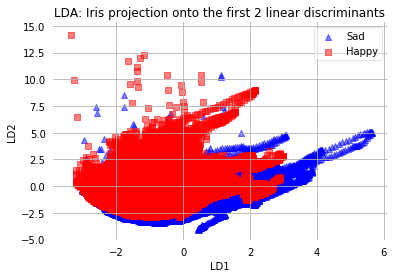

In [43]:
newX_dataDF = newDF.drop("label", axis=1)
newY_data = newDF["label"].values
# Convert dataframe to numpy
newX_data = newX_dataDF.as_matrix(columns=None)
plot_step_lda(newX_data, newY_data)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


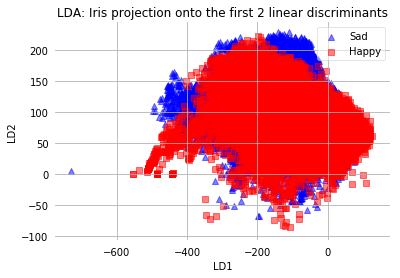

In [44]:
plot_step_lda(x_data.as_matrix(columns=None), y_data)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


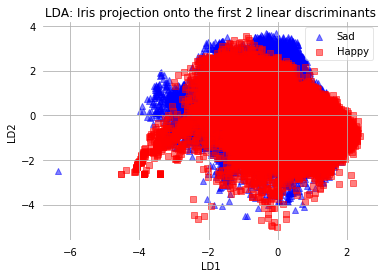

In [45]:
plot_step_lda(features, y_data)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


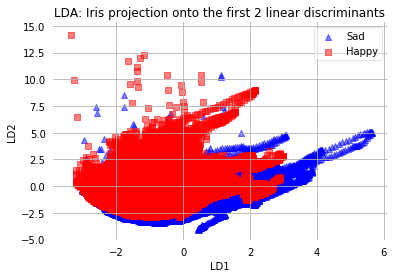

In [46]:
plot_step_lda(features_pca, y_data)